In [12]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

import dataframe_image as dfi

In [2]:
file = pd.read_csv("Data/CleanData_mileage_price_enginesize.csv")
file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0


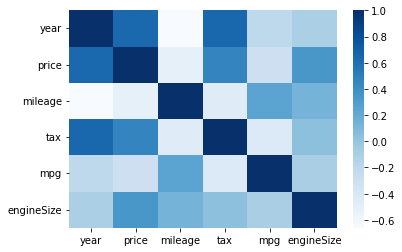

In [3]:
corrs = file.corr()
corrs2 = sns.heatmap(corrs,cmap="Blues")
plt.show() 
fig = corrs2.get_figure()
# fig.savefig("corr_plot.png") 

In [4]:
corrs

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.637150,-0.660502,0.644144,-0.203025,-0.102806
price,0.637150,1.000000,-0.517358,0.463456,-0.299791,0.341213
mileage,-0.660502,-0.517358,1.000000,-0.455964,0.248111,0.128927
tax,0.644144,0.463456,-0.455964,1.000000,-0.427333,0.036411
mpg,-0.203025,-0.299791,0.248111,-0.427333,1.000000,-0.099222
engineSize,-0.102806,0.341213,0.128927,0.036411,-0.099222,1.000000


# Do Yaris or Aygo have a higher price? How about Fiesta or Focus?

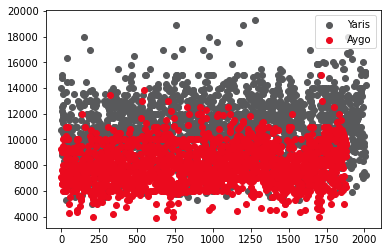

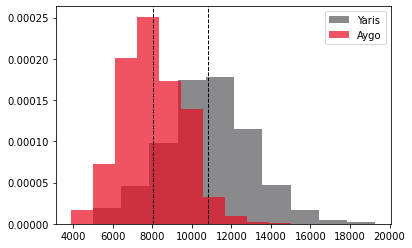

In [5]:
population1a = file.loc[file["model"]=="Yaris",:]
population2a= file.loc[file["model"]=="Aygo",:]
population1b = population1a["price"]
population2b = population2a["price"]

plt.scatter(range(len(population1b)), population1b, label="Yaris", c = "#58595B")
plt.scatter(range(len(population2b)), population2b, label="Aygo", c = "#EB0A1E")
plt.legend()
plt.show()

plt.hist(population1b, 10, density=True, alpha=0.7, label="Yaris", color = "#58595B")
plt.hist(population2b, 10, density=True, alpha=0.7, label="Aygo", color = "#EB0A1E")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()

In [6]:
yaris_mean = np.mean(population1b)
yaris_mean2 = round(yaris_mean, 2)
yaris_mean2

10832.58

In [7]:
aygo_mean = np.mean(population2b)
aygo_mean2 = round(aygo_mean,2)
aygo_mean2

8035.19

In [8]:
yaris_var = np.var(population1b)
yaris_var2 = round(yaris_var, 2)
yaris_var2

4917028.23

In [9]:
aygo_var = np.var(population2b)
aygo_var2 = round(aygo_var, 2)
aygo_var2

2353636.67

In [10]:
# initialize list of lists
data = [['Yaris', yaris_mean2, yaris_var2], ['Aygo', aygo_mean2, aygo_var2]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ["Toyota Model",'Average Price', 'Variance'])
 
# print dataframe.
df.set_index('Toyota Model')
df.style.format({'Average Price':"${:20,.2f}", 'Variance':"{:20,.0f}"})

,Toyota Model,Average Price,Variance
0,Yaris,"$ 10,832.58","4,917,028"
1,Aygo,"$ 8,035.19","2,353,637"


In [13]:
dfi.export(df,"averages1.png")

In [14]:
stats.ttest_ind(population1b, population2b, equal_var=False)

Ttest_indResult(statistic=45.988905425489676, pvalue=0.0)

## The price of Yaris is statistical different than Aygo

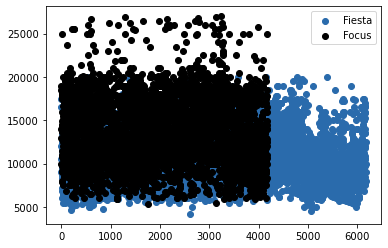

In [18]:
population1c = file.loc[file["model"]=="Fiesta",:]
population2c= file.loc[file["model"]=="Focus",:]
population1d = population1c["price"]
population2d = population2c["price"]

plt.scatter(range(len(population1d)), population1d, label="Fiesta", c = "#2A6BAC")
plt.scatter(range(len(population2d)), population2d, label="Focus", c = "#000000")
plt.legend()
plt.show()



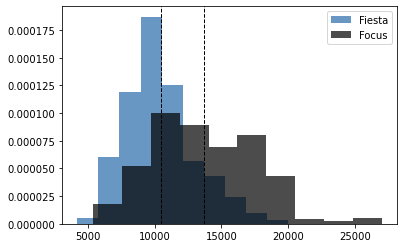

In [19]:
plt.hist(population1d, 10, density=True, alpha=0.7, label="Fiesta", color = "#2A6BAC")
plt.hist(population2d, 10, density=True, alpha=0.7, label="Focus", color = "#000000")
plt.axvline(population1d.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2d.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()

In [21]:
fiesta_mean = np.mean(population1d)
fiesta_mean2 = round(fiesta_mean, 2)
fiesta_mean2

10439.25

In [22]:
focus_mean = np.mean(population2d)
focus_mean2 = round(focus_mean,2)
focus_mean2

13721.95

In [26]:
fiesta_var = np.var(population1d)
fiesta_var2 = round(fiesta_var)
fiesta_var2

6891327

In [27]:
focus_var = np.var(population2d)
focus_var2 = round(focus_var)
focus_var2

14784735

In [28]:
# initialize list of lists
data = [['Fiesta', fiesta_mean2, fiesta_var2], ['Focus', focus_mean2, focus_var2]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ["Ford Model",'Average Price', 'Variance'])
 
# print dataframe.
df.set_index('Ford Model')
df.style.format({'Average Price':"${:20,.2f}", 'Variance':"{:20,.0f}"})

,Ford Model,Average Price,Variance
0,Fiesta,"$ 10,439.25","6,891,327"
1,Focus,"$ 13,721.95","14,784,735"


In [29]:
dfi.export(df,"averages2.png")

In [30]:
stats.ttest_ind(population1d, population2d, equal_var=False)

Ttest_indResult(statistic=-48.08611636716135, pvalue=0.0)

## The price of Focus is statistical higher than Fiesta

# Is there more price variation within a brand of car or between brands?

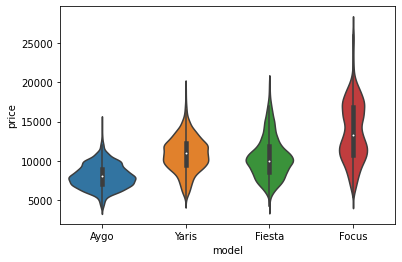

In [31]:
sns.violinplot(data=file, x="model", y="price")
plt.show()

In [ ]:
#https://towardsdatascience.com/anova-test-with-python-cfbf4013328b

### Normality Assumption Check

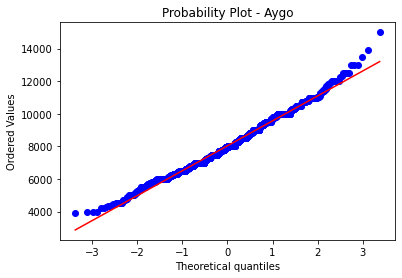

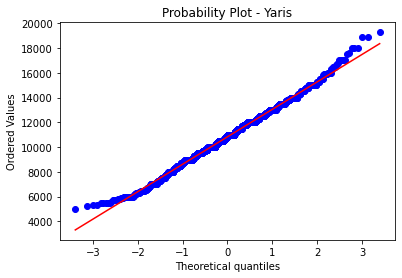

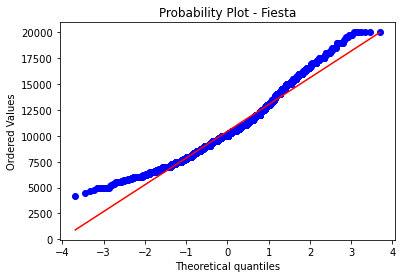

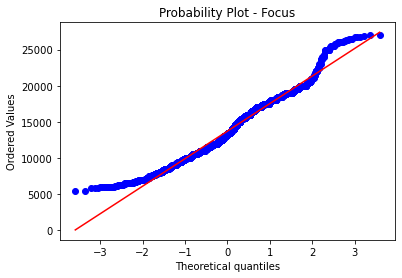

In [32]:
models = file['model'].unique()
for model in models:
    stats.probplot(file[file['model'] == model]['price'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  model)
    plt.show()

### Homogeneity of variance Assumption Check

In [37]:
file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0


In [38]:
new = file[['model', 'price']].copy()

In [39]:
ratio = new.groupby('model').std().max() / new.groupby('model').std().min()
ratio

price    2.505957
dtype: float64

### Borderline in terms of meeting the homogeneity of varianace assumption

### Hypothesis Testing

In [40]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = file['price'].mean()
SSTR = file.groupby('model').count() * (file.groupby('model').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['price'].sum()

# calculate SSE and update anova table
SSE = (file.groupby('model').count() - 1) * file.groupby('model').std()**2
anova_table['SS']['Within Groups'] = SSE['price'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['price'].sum() + SSE['price'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = file['model'].nunique() - 1
anova_table['df']['Within Groups'] = file.shape[0] - file['model'].nunique()
anova_table['df']['Total'] =file.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,49186796415.574593,3,16395598805.19153,1968.301148,0.0,3.117049
Within Groups,118525041551.405396,14229,8329822.303142,,,
Total,167711837966.97998,14232,11784137.012857,,,


In [41]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1968.3011483939365  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.


In [44]:
file.groupby("model").agg({"price": ["mean", "std", "var", "count"]}, axis=1)

price                                 
                mean          std           var count
model                                                
Aygo     8035.186504  1534.564412  2.354888e+06  1882
Fiesta  10439.252594  2625.346561  6.892445e+06  6168
Focus   13721.954480  3845.552951  1.478828e+07  4174
Yaris   10832.577899  2217.989393  4.919477e+06  2009

In [45]:
group1 = file[file["model"] == "Aygo"]["price"]
group2 = file[file["model"] == "Fiesta"]["price"]
group3 = file[file["model"] == "Focus"]["price"]
group4 = file[file["model"] == "Yaris"]["price"]

In [46]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=1968.3011483939333, pvalue=0.0)

In [47]:
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=True))
print(stats.ttest_ind(group1, group4, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=True))

print(stats.ttest_ind(group3, group4, equal_var=False))

Ttest_indResult(statistic=-49.395735208981066, pvalue=0.0)
Ttest_indResult(statistic=-61.964700033848835, pvalue=0.0)
Ttest_indResult(statistic=-45.988905425489676, pvalue=0.0)
Ttest_indResult(statistic=-48.08611636716135, pvalue=0.0)
Ttest_indResult(statistic=-6.048692808286863, pvalue=1.5244509953093368e-09)
Ttest_indResult(statistic=37.32761108786972, pvalue=2.2538578977462175e-274)


## The groups are statistical different in price based on an ANOVA test

## Should any prices from certain years be adjusted for inflation? 

## No, since all the data is in 2020 euros

## Does year impact the price of a car in the used car market? 

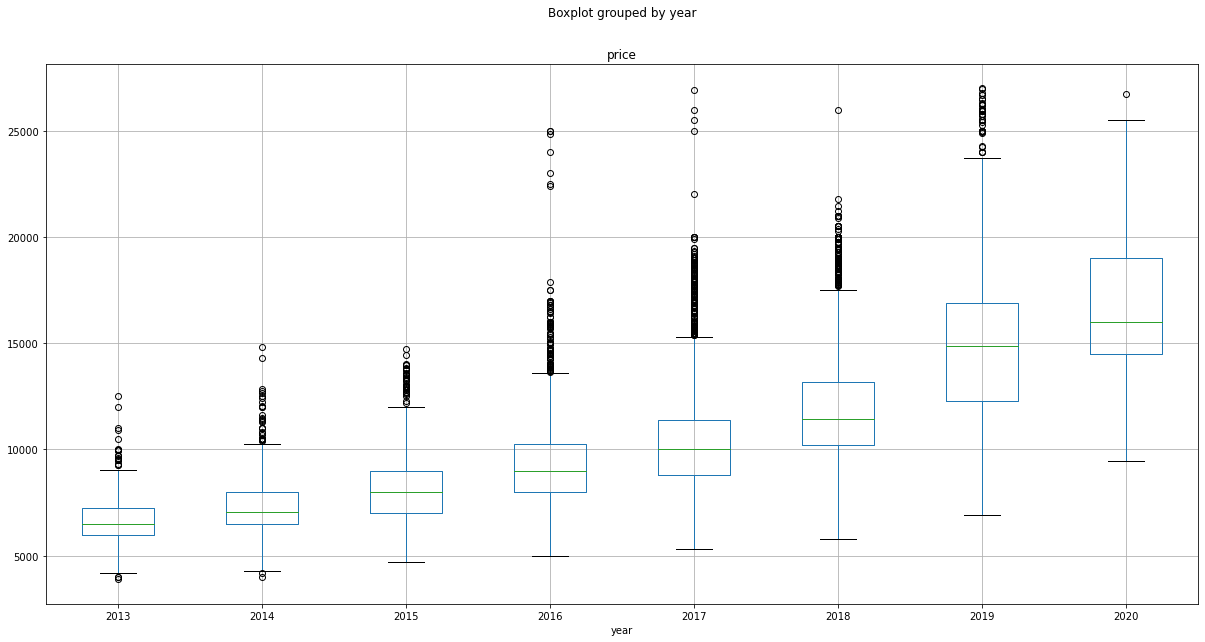

In [42]:
file.boxplot("price", by="year", figsize=(20, 10))
plt.show()

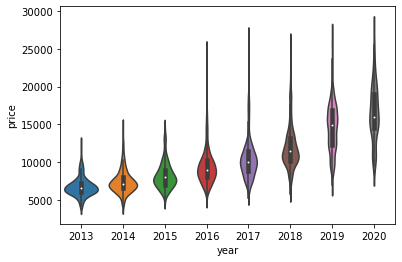

In [43]:
sns.violinplot(data=file, x="year", y="price")
plt.show()

The r-value is: 0.6371501065976654


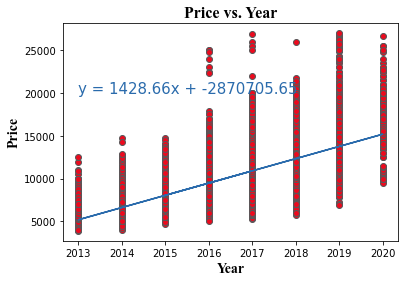

In [53]:
r8 = corrs.iloc[1]["year"]
print(f"The r-value is: {r8}")

x_values = file['year']
y_values = file['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="#EB0A1E", edgecolors="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(2013,20000),fontsize=15,color="#2A6BAC")
plt.title("Price vs. Year", fontsize=16, fontweight="bold", fontname="Times New Roman")
plt.xlabel('Year', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Price', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.show()

## Year is positive correlated with price